In [2]:
## Cell 1: Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D

In [7]:
## Cell 2: Load Data and Create Connectivity Matrix
# Load data from the same path used in your existing script
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
data_df = pd.read_csv(f"{results_dir}/fc_ppi/matchvlad_seed_target_activations.csv")
fc_data = data_df[data_df['analysis'] == 'fc']
ppi_data = data_df[data_df['analysis'] == 'ppi']

# Display first few rows to understand the structure
print("Dataset overview:")
print(fc_data.head())
print("\nColumns:", fc_data.columns.tolist())

# Check unique values for key columns
print("\nUnique seed hemispheres:", fc_data['seed_hemisphere'].unique())
print("Unique target hemispheres:", fc_data['target_hemisphere'].unique())
print("Unique seed ROIs:", fc_data['seed_roi'].unique())
print("Unique target ROIs:", fc_data['target_roi'].unique())

Dataset overview:
   subject seed_roi seed_hemisphere target_roi target_hemisphere task  \
0  sub-025     pIPS            left         LO              left  loc   
1  sub-025     pIPS            left         LO             right  loc   
2  sub-025     pIPS           right         LO              left  loc   
3  sub-025     pIPS           right         LO             right  loc   
8  sub-038     pIPS            left         LO              left  loc   

  analysis  mean_activation  
0       fc         0.176975  
1       fc         0.150175  
2       fc         0.171803  
3       fc         0.165211  
8       fc         0.202259  

Columns: ['subject', 'seed_roi', 'seed_hemisphere', 'target_roi', 'target_hemisphere', 'task', 'analysis', 'mean_activation']

Unique seed hemispheres: ['left' 'right']
Unique target hemispheres: ['left' 'right']
Unique seed ROIs: ['pIPS']
Unique target ROIs: ['LO']


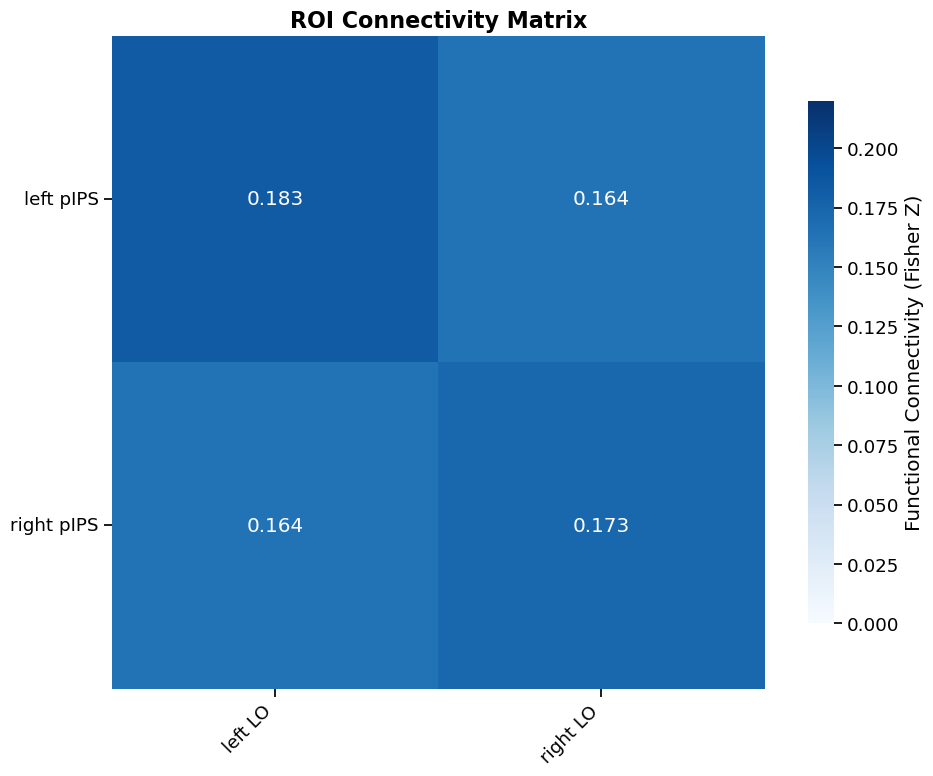

In [ ]:
## Cell 3a: Sample Create a Connectivity Matrix 
def create_connectivity_matrix(data):
    """
    Create a connectivity matrix from the FC data
    """
    # Set style parameters
    plt.style.use('default')
    sns.set_context("notebook", font_scale=1.2)
    
    # Extract unique seed and target regions/hemispheres
    seed_rois = data['seed_roi'].unique()
    target_rois = data['target_roi'].unique()
    hemispheres = ['left', 'right']
    
    # Create labels for matrix
    row_labels = [f"{hemi} {roi}" for roi in seed_rois for hemi in hemispheres]
    col_labels = [f"{hemi} {roi}" for roi in target_rois for hemi in hemispheres]
    
    # Initialize matrix with NaN values
    n_rows = len(row_labels)
    n_cols = len(col_labels)
    conn_matrix = np.full((n_rows, n_cols), np.nan)
    
    # Fill matrix with mean activation values
    for i, row_label in enumerate(row_labels):
        row_hemi, row_roi = row_label.split(' ', 1)
        for j, col_label in enumerate(col_labels):
            col_hemi, col_roi = col_label.split(' ', 1)
            
            # Filter data for this connection
            mask = (
                (data['seed_hemisphere'] == row_hemi) & 
                (data['seed_roi'] == row_roi) & 
                (data['target_hemisphere'] == col_hemi) & 
                (data['target_roi'] == col_roi)
            )
            
            if mask.any():
                conn_matrix[i, j] = data.loc[mask, 'mean_activation'].mean()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create heatmap
    # Using a blue color palette for better visualization of connectivity strengths
    cmap = sns.color_palette("Blues", as_cmap=True)
    mask = np.isnan(conn_matrix)
    
    sns.heatmap(
        conn_matrix, 
        mask=mask,
        cmap=cmap, 
        vmin=0, 
        vmax=0.22,  # Based on your original plot's y-limit
        square=True, 
        xticklabels=col_labels, 
        yticklabels=row_labels,
        cbar_kws={"shrink": .8, "label": "Functional Connectivity (Fisher Z)"},
        annot=True,   # Add numerical annotations
        fmt=".3f"     # Format with 3 decimal places
    )
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.title('ROI Connectivity Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    return fig, conn_matrix

# Create and display connectivity matrix
matrix_fig, conn_matrix = create_connectivity_matrix(fc_data)
plt.show()


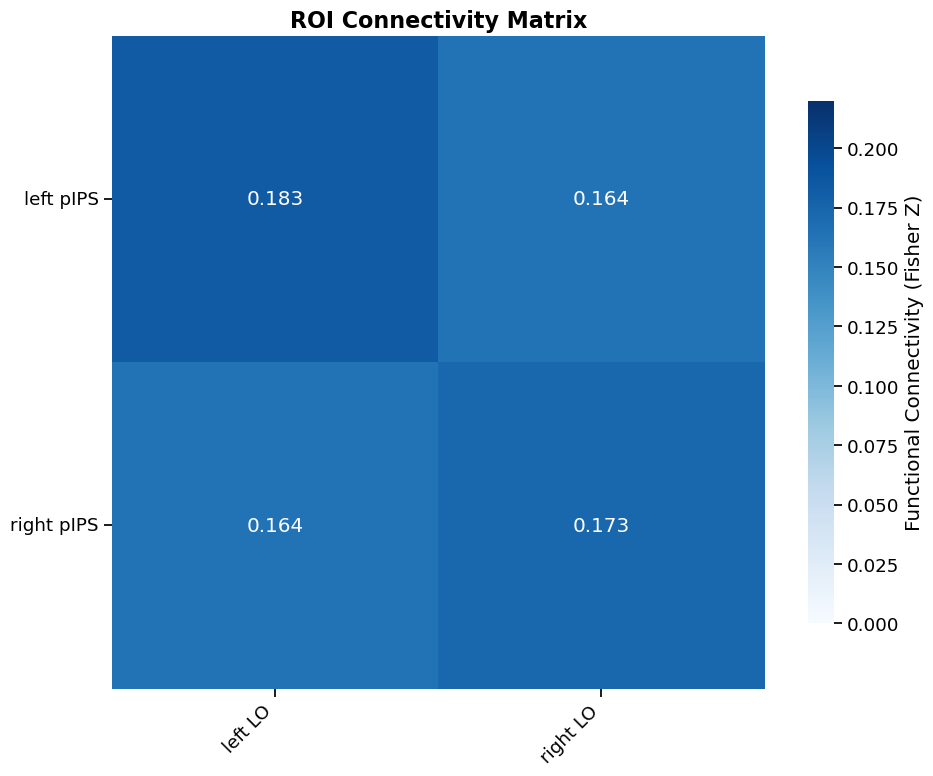

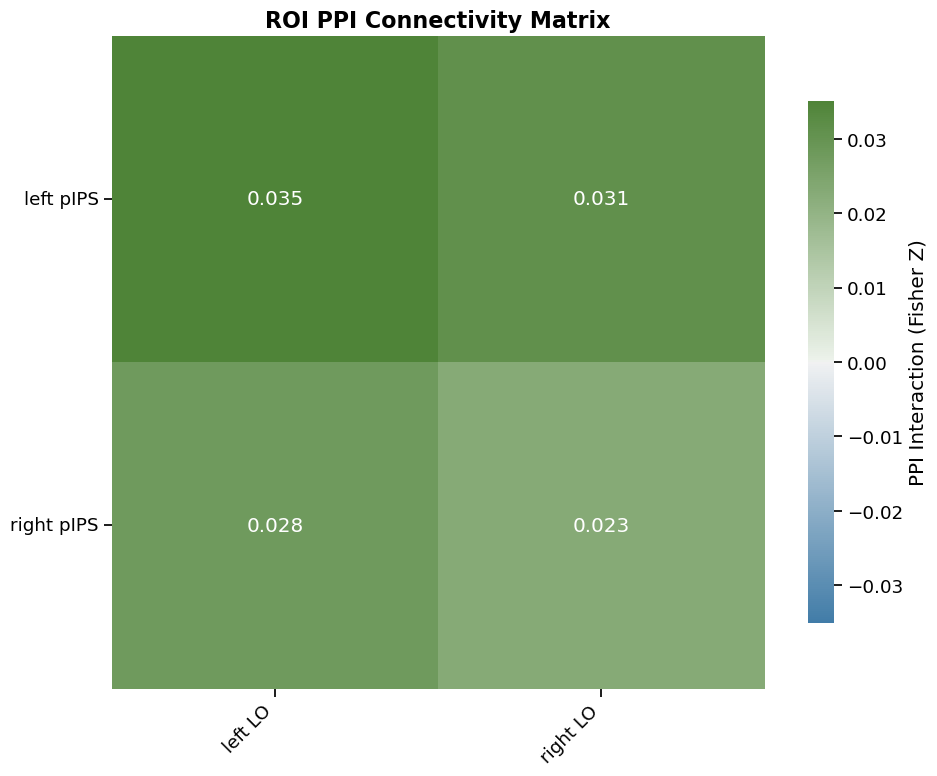

In [ ]:
## Cell 3b: Create a full FC and PPI Connectivity Matrix 
# limited to one direction and only LO and pIPS
def create_connectivity_matrix(data, analysis_type):
    """
    Create a connectivity matrix from the data
    
    Parameters:
    -----------
    data : DataFrame
        The full dataframe containing both FC and PPI data
    analysis_type : str
        Either 'fc' or 'ppi' to specify which type of matrix to create
    """
    # Filter data for the requested analysis type
    filtered_data = data[data['analysis'] == analysis_type]
    
    # Set style parameters
    plt.style.use('default')
    sns.set_context("notebook", font_scale=1.2)
    
    # Extract unique seed and target regions/hemispheres
    seed_rois = filtered_data['seed_roi'].unique()
    target_rois = filtered_data['target_roi'].unique()
    hemispheres = ['left', 'right']
    
    # Create labels for matrix
    row_labels = [f"{hemi} {roi}" for roi in seed_rois for hemi in hemispheres]
    col_labels = [f"{hemi} {roi}" for roi in target_rois for hemi in hemispheres]
    
    # Initialize matrix with NaN values
    n_rows = len(row_labels)
    n_cols = len(col_labels)
    conn_matrix = np.full((n_rows, n_cols), np.nan)
    
    # Fill matrix with mean activation values
    for i, row_label in enumerate(row_labels):
        row_hemi, row_roi = row_label.split(' ', 1)
        for j, col_label in enumerate(col_labels):
            col_hemi, col_roi = col_label.split(' ', 1)
            
            # Filter data for this connection
            mask = (
                (filtered_data['seed_hemisphere'] == row_hemi) & 
                (filtered_data['seed_roi'] == row_roi) & 
                (filtered_data['target_hemisphere'] == col_hemi) & 
                (filtered_data['target_roi'] == col_roi)
            )
            
            if mask.any():
                conn_matrix[i, j] = filtered_data.loc[mask, 'mean_activation'].mean()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Define visualization parameters based on analysis type
    if analysis_type == 'ppi':
        # For PPI data, use a diverging palette
        cmap = sns.diverging_palette(240, 120, as_cmap=True)
        # For PPI data, values can be positive or negative, so use symmetric limits
        abs_max = np.nanmax(np.abs(conn_matrix))
        vmin, vmax = -abs_max, abs_max
        cbar_label = "PPI Interaction (Fisher Z)"
        title = 'ROI PPI Connectivity Matrix'
    else:  # FC data
        cmap = sns.color_palette("Blues", as_cmap=True)
        vmin, vmax = 0, 0.22
        cbar_label = "Functional Connectivity (Fisher Z)"
        title = 'ROI Connectivity Matrix'
        
    mask = np.isnan(conn_matrix)
    
    sns.heatmap(
        conn_matrix, 
        mask=mask,
        cmap=cmap, 
        vmin=vmin, 
        vmax=vmax,
        square=True, 
        xticklabels=col_labels, 
        yticklabels=row_labels,
        cbar_kws={"shrink": .8, "label": cbar_label},
        annot=True,   # Add numerical annotations
        fmt=".3f"     # Format with 3 decimal places
    )
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    return fig, conn_matrix

# Create and display FC connectivity matrix
fc_matrix_fig, fc_matrix = create_connectivity_matrix(data_df, 'fc')
plt.show()

# Create and display PPI connectivity matrix
ppi_matrix_fig, ppi_matrix = create_connectivity_matrix(data_df, 'ppi')
plt.show()

In [ ]:
## Cell 3c: Full FC and PPI Connectivity Matrix
# SHOULD be functional once extraction script finishes running.
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define file path - modify this to point to your actual data file
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
data_file = f'{results_dir}/fc_ppi/all_roi_connectivity.csv'

# Load the data
data_df = pd.read_csv(data_file)

def create_connectivity_matrix(data, analysis_type):
    """
    Create a connectivity matrix from the data
    
    Parameters:
    -----------
    data : DataFrame
        The full dataframe containing both FC and PPI data
    analysis_type : str
        Either 'fc' or 'ppi' to specify which type of matrix to create
    """
    # Filter data for the requested analysis type
    filtered_data = data[data['analysis'] == analysis_type]
    
    # Set style parameters
    plt.style.use('default')
    sns.set_context("notebook", font_scale=1.2)
    
    # Define ROIs - these are now hardcoded to match your script
    rois = ['pIPS', 'LO', 'PFS', 'aIPS']
    hemispheres = ['left', 'right']
    
    # Create labels for matrix
    row_labels = [f"{hemi} {roi}" for roi in rois for hemi in hemispheres]
    col_labels = [f"{hemi} {roi}" for roi in rois for hemi in hemispheres]
    
    # Initialize matrix with NaN values
    n_rows = len(row_labels)
    n_cols = len(col_labels)
    conn_matrix = np.full((n_rows, n_cols), np.nan)
    
    # Fill matrix with mean activation values
    for i, row_label in enumerate(row_labels):
        row_hemi, row_roi = row_label.split(' ', 1)
        for j, col_label in enumerate(col_labels):
            col_hemi, col_roi = col_label.split(' ', 1)
            
            # Skip self-connections
            if row_roi == col_roi and row_hemi == col_hemi:
                continue
                
            # Filter data for this connection
            mask = (
                (filtered_data['seed_hemisphere'] == row_hemi) & 
                (filtered_data['seed_roi'] == row_roi) & 
                (filtered_data['target_hemisphere'] == col_hemi) & 
                (filtered_data['target_roi'] == col_roi)
            )
            
            if mask.any():
                conn_matrix[i, j] = filtered_data.loc[mask, 'mean_activation'].mean()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Define visualization parameters based on analysis type
    if analysis_type == 'ppi':
        # For PPI data, use a diverging palette
        cmap = sns.diverging_palette(240, 120, as_cmap=True)
        # For PPI data, values can be positive or negative, so use symmetric limits
        abs_max = np.nanmax(np.abs(conn_matrix))
        vmin, vmax = -abs_max, abs_max
        cbar_label = "PPI Interaction (Fisher Z)"
        title = 'ROI PPI Connectivity Matrix'
    else:  # FC data
        cmap = sns.color_palette("Blues", as_cmap=True)
        vmin, vmax = 0, 0.22
        cbar_label = "Functional Connectivity (Fisher Z)"
        title = 'ROI Connectivity Matrix'
        
    mask = np.isnan(conn_matrix)
    
    sns.heatmap(
        conn_matrix, 
        mask=mask,
        cmap=cmap, 
        vmin=vmin, 
        vmax=vmax,
        square=True, 
        xticklabels=col_labels, 
        yticklabels=row_labels,
        cbar_kws={"shrink": .8, "label": cbar_label},
        annot=True,   # Add numerical annotations
        fmt=".3f"     # Format with 3 decimal places
    )
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    return fig, conn_matrix

# Create and display FC connectivity matrix
fc_matrix_fig, fc_matrix = create_connectivity_matrix(data_df, 'fc')
plt.show()

# Create and display PPI connectivity matrix
ppi_matrix_fig, ppi_matrix = create_connectivity_matrix(data_df, 'ppi')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/user_data/csimmon2/git_repos/ptoc/results/fc_ppi/all_roi_connectivity.csv'

*testing*

In [17]:
# Cell 1: Initial data exploration
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Load your data
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
data_df = pd.read_csv(f"{results_dir}/fc_ppi/matchvlad_seed_target_activations.csv")

# Separate FC and PPI data
fc_data = data_df[data_df['analysis'] == 'fc']
ppi_data = data_df[data_df['analysis'] == 'ppi']

# Understand your data structure
print("Dataset overview:")
print(fc_data.head())
print("\nColumns:", fc_data.columns.tolist())

# Check key information
print("\nUnique seed ROIs:", fc_data['seed_roi'].unique())
print("Unique target ROIs:", fc_data['target_roi'].unique())
print("Unique seed hemispheres:", fc_data['seed_hemisphere'].unique())
print("Unique target hemispheres:", fc_data['target_hemisphere'].unique())

Dataset overview:
   subject seed_roi seed_hemisphere target_roi target_hemisphere task  \
0  sub-025     pIPS            left         LO              left  loc   
1  sub-025     pIPS            left         LO             right  loc   
2  sub-025     pIPS           right         LO              left  loc   
3  sub-025     pIPS           right         LO             right  loc   
8  sub-038     pIPS            left         LO              left  loc   

  analysis  mean_activation  
0       fc         0.176975  
1       fc         0.150175  
2       fc         0.171803  
3       fc         0.165211  
8       fc         0.202259  

Columns: ['subject', 'seed_roi', 'seed_hemisphere', 'target_roi', 'target_hemisphere', 'task', 'analysis', 'mean_activation']

Unique seed ROIs: ['pIPS']
Unique target ROIs: ['LO']
Unique seed hemispheres: ['left' 'right']
Unique target hemispheres: ['left' 'right']


In [21]:
# Cell 2: Identify available ROI files
import glob
import nibabel as nib
import os
import pandas as pd
import numpy as np

def list_roi_files(base_path="/user_data/csimmon2/git_repos/ptoc/roiParcels"):
    """
    List all ROI files in the specified directory
    
    Parameters:
    -----------
    base_path : str
        Path to the directory containing ROI files
    
    Returns:
    --------
    pandas.DataFrame
        Information about each ROI file
    """
    # Check if the directory exists
    if not os.path.exists(base_path):
        print(f"Error: Directory {base_path} does not exist")
        return pd.DataFrame()
    
    # Find all NIfTI files in the directory
    roi_files = glob.glob(os.path.join(base_path, "*.nii.gz"))
    
    print(f"Found {len(roi_files)} ROI files in {base_path}:")
    
    # Create a summary dataframe
    roi_info = []
    
    for roi_file in roi_files:
        roi_name = os.path.basename(roi_file).split('.')[0]
        
        try:
            # Load the ROI file
            roi_img = nib.load(roi_file)
            
            # Get basic information
            shape = roi_img.shape
            data_type = roi_img.get_data_dtype()
            
            # Count non-zero voxels (approximate ROI size)
            data = roi_img.get_fdata()
            non_zero = np.count_nonzero(data)
            
            roi_info.append({
                'Name': roi_name,
                'File': roi_file,
                'Shape': shape,
                'Data Type': data_type,
                'Non-Zero Voxels': non_zero
            })
            
        except Exception as e:
            print(f"Error loading {roi_file}: {e}")
            roi_info.append({
                'Name': roi_name,
                'File': roi_file,
                'Error': str(e)
            })
    
    return pd.DataFrame(roi_info)

# List ROI files using the full path provided
roi_files_df = list_roi_files("/user_data/csimmon2/git_repos/ptoc/roiParcels")
print(roi_files_df)

# Check if we found any files
if len(roi_files_df) == 0:
    print("No ROI files found. Let's try listing the directory content:")
    try:
        import subprocess
        result = subprocess.run(["ls", "-la", "/user_data/csimmon2/git_repos/ptoc/roiParcels"], 
                               capture_output=True, text=True)
        print(result.stdout)
    except Exception as e:
        print(f"Error listing directory: {e}")
        
    # Let's also check parent directories
    print("\nChecking parent directory structure:")
    try:
        result = subprocess.run(["ls", "-la", "/user_data/csimmon2/git_repos/ptoc"], 
                               capture_output=True, text=True)
        print(result.stdout)
    except Exception as e:
        print(f"Error listing parent directory: {e}")

Found 10 ROI files in /user_data/csimmon2/git_repos/ptoc/roiParcels:
                    Name                                               File  \
0                     LO  /user_data/csimmon2/git_repos/ptoc/roiParcels/...   
1                    PFS  /user_data/csimmon2/git_repos/ptoc/roiParcels/...   
2                   pIPS  /user_data/csimmon2/git_repos/ptoc/roiParcels/...   
3                     V1  /user_data/csimmon2/git_repos/ptoc/roiParcels/...   
4    MNI152_T1_2mm_brain  /user_data/csimmon2/git_repos/ptoc/roiParcels/...   
5                    lA1  /user_data/csimmon2/git_repos/ptoc/roiParcels/...   
6                    rA1  /user_data/csimmon2/git_repos/ptoc/roiParcels/...   
7   dorsal_visual_cortex  /user_data/csimmon2/git_repos/ptoc/roiParcels/...   
8                   aIPS  /user_data/csimmon2/git_repos/ptoc/roiParcels/...   
9  ventral_visual_cortex  /user_data/csimmon2/git_repos/ptoc/roiParcels/...   

             Shape Data Type  Non-Zero Voxels  
0    (91, 109

In [22]:
# Cell 3: Load Glasser atlas
import os
import nibabel as nib
import numpy as np
import pandas as pd
import glob
import subprocess

def find_glasser_atlas():
    """
    Search for the Glasser atlas in common locations
    
    Returns:
    --------
    str or None
        Path to the atlas if found, None otherwise
    """
    # Common locations to search for the Glasser atlas
    possible_paths = [
        # Standard locations
        "/user_data/csimmon2/git_repos/ptoc/data/atlases/HCP-MMP1_on_MNI152_ICBM2009a_nlin.nii.gz",
        "/user_data/csimmon2/git_repos/ptoc/data/HCP-MMP1_on_MNI152_ICBM2009a_nlin.nii.gz",
        "/user_data/csimmon2/git_repos/ptoc/atlases/HCP-MMP1_on_MNI152_ICBM2009a_nlin.nii.gz",
        "/user_data/csimmon2/git_repos/ptoc/HCP-MMP1_on_MNI152_ICBM2009a_nlin.nii.gz",
        
        # Common filenames
        "/user_data/csimmon2/git_repos/ptoc/data/atlases/HCP-MMP1.nii.gz",
        "/user_data/csimmon2/git_repos/ptoc/data/HCP-MMP1.nii.gz",
        "/user_data/csimmon2/git_repos/ptoc/atlases/HCP-MMP1.nii.gz",
        "/user_data/csimmon2/git_repos/ptoc/HCP-MMP1.nii.gz",
        
        # Alternative spellings
        "/user_data/csimmon2/git_repos/ptoc/data/atlases/Glasser.nii.gz",
        "/user_data/csimmon2/git_repos/ptoc/data/Glasser.nii.gz",
        "/user_data/csimmon2/git_repos/ptoc/atlases/Glasser.nii.gz",
        "/user_data/csimmon2/git_repos/ptoc/Glasser.nii.gz"
    ]
    
    # Check each path
    for path in possible_paths:
        if os.path.exists(path):
            return path
    
    # If not found in predefined locations, try searching the repository
    try:
        repo_dir = "/user_data/csimmon2/git_repos/ptoc"
        print(f"Searching for Glasser atlas in {repo_dir}...")
        
        # Find all .nii.gz files in the repository
        command = f"find {repo_dir} -name '*.nii.gz' | grep -i glasser || find {repo_dir} -name '*.nii.gz' | grep -i hcp || find {repo_dir} -name '*.nii.gz' | grep -i mmp"
        result = subprocess.run(command, shell=True, capture_output=True, text=True)
        
        # Check if any files were found
        if result.stdout.strip():
            possible_files = result.stdout.strip().split('\n')
            print(f"Found {len(possible_files)} potential atlas files:")
            for i, file in enumerate(possible_files):
                print(f"{i+1}. {file}")
            
            # Return the first found file
            return possible_files[0]
    except Exception as e:
        print(f"Error searching for atlas files: {e}")
    
    return None

def load_glasser_atlas(atlas_path=None):
    """
    Load the Glasser atlas and its labels
    
    Parameters:
    -----------
    atlas_path : str, optional
        Path to the Glasser atlas file
        
    Returns:
    --------
    tuple
        (atlas_img, atlas_labels, found_path)
    """
    # If no path provided, try to find it
    if atlas_path is None:
        atlas_path = find_glasser_atlas()
        
        if atlas_path is None:
            print("Glasser atlas not found. Please specify the path manually.")
            
            # Let's list some directories to help locate it
            try:
                dirs_to_check = [
                    "/user_data/csimmon2/git_repos/ptoc/data",
                    "/user_data/csimmon2/git_repos/ptoc/data/atlases",
                    "/user_data/csimmon2/git_repos/ptoc/atlases"
                ]
                
                for directory in dirs_to_check:
                    if os.path.exists(directory):
                        print(f"\nContents of {directory}:")
                        result = subprocess.run(["ls", "-la", directory], 
                                              capture_output=True, text=True)
                        print(result.stdout)
            except Exception as e:
                print(f"Error listing directories: {e}")
                
            return None, None, None
    
    # Load the atlas
    try:
        glasser_img = nib.load(atlas_path)
        print(f"Successfully loaded Glasser atlas from {atlas_path}")
        print(f"Shape: {glasser_img.shape}")
        print(f"Data type: {glasser_img.get_data_dtype()}")
        
        # Try to find label file in the same directory
        atlas_dir = os.path.dirname(atlas_path)
        
        # Potential label file names
        label_files = [
            "HCP-MMP1_labels.csv",
            "Glasser_labels.csv",
            "HCP_labels.csv",
            "MMP1_labels.csv",
            "glasser_labels.csv",
            "atlas_labels.csv"
        ]
        
        # Look for labels file
        glasser_labels = None
        labels_path = None
        
        for label_file in label_files:
            candidate_path = os.path.join(atlas_dir, label_file)
            if os.path.exists(candidate_path):
                try:
                    glasser_labels = pd.read_csv(candidate_path)
                    labels_path = candidate_path
                    break
                except:
                    continue
        
        # If labels file found
        if glasser_labels is not None:
            print(f"Loaded Glasser labels from {labels_path}")
            print(f"Number of regions: {len(glasser_labels)}")
            print(f"Columns: {glasser_labels.columns.tolist()}")
            print(glasser_labels.head())
        else:
            print("No labels file found. Creating basic labels.")
            
            # Create basic labels from unique values
            atlas_data = glasser_img.get_fdata()
            unique_values = np.unique(atlas_data)
            unique_values = unique_values[unique_values > 0]  # Skip background
            
            glasser_labels = pd.DataFrame({
                'id': unique_values,
                'name': [f"Region_{int(val)}" for val in unique_values]
            })
            
            print(f"Created basic labels for {len(glasser_labels)} regions")
            
        return glasser_img, glasser_labels, atlas_path
        
    except Exception as e:
        print(f"Error loading Glasser atlas: {e}")
        return None, None, None

# Try to load the Glasser atlas
glasser_img, glasser_labels, glasser_path = load_glasser_atlas()

# Display summary of the atlas
if glasser_img is not None:
    glasser_data = glasser_img.get_fdata()
    unique_regions = np.unique(glasser_data)
    unique_regions = unique_regions[unique_regions > 0]  # Remove background
    
    print(f"\nGlasser Atlas Summary:")
    print(f"Number of distinct regions: {len(unique_regions)}")
    print(f"Region ID range: {np.min(unique_regions)} to {np.max(unique_regions)}")
    
    # Check for potential issues
    total_nonzero = np.count_nonzero(glasser_data)
    print(f"Total non-zero voxels: {total_nonzero}")
else:
    print("\nFailed to load Glasser atlas.")

Searching for Glasser atlas in /user_data/csimmon2/git_repos/ptoc...
Found 2 potential atlas files:
1. /user_data/csimmon2/git_repos/ptoc/unsorted_or_tobedeleted/glasser/HCP-MMP1_on_MNI152_ICBM2009a_nlin_hd.nii.gz
2. /user_data/csimmon2/git_repos/ptoc/unsorted_or_tobedeleted/glasser/HCP-MMP1_on_MNI152_ICBM2009a_nlin.nii.gz
Successfully loaded Glasser atlas from /user_data/csimmon2/git_repos/ptoc/unsorted_or_tobedeleted/glasser/HCP-MMP1_on_MNI152_ICBM2009a_nlin_hd.nii.gz
Shape: (393, 465, 377)
Data type: float32
No labels file found. Creating basic labels.
Created basic labels for 180 regions

Glasser Atlas Summary:
Number of distinct regions: 180
Region ID range: 0.9999999997671694 to 179.99999995809048
Total non-zero voxels: 6047858


Mapping ROI: LO.nii.gz
ROI shape: (91, 109, 91)
ROI data type: uint8
ROI original voxel count: 4245
Dimensions don't match. ROI: (91, 109, 91), Atlas: (393, 465, 377)
Resampling ATLAS to match ROI dimensions...
Original atlas shape: (393, 465, 377)
Resampled atlas shape: (91, 109, 91)
ROI value range: 0.0 to 1.0
ROI non-zero voxels: 4245
Found 19 overlapping atlas regions

LO Mapping Results (top 10 overlapping regions):
   ROI  Atlas_id  Atlas_name  Overlap_voxels  Overlap_percentage  \
10  LO       137  Region_137             530           12.485277   
11  LO       138  Region_138             530           12.485277   
12  LO       139  Region_139             528           12.438163   
15  LO       157  Region_157             369            8.692580   
14  LO       156  Region_156             367            8.645465   
16  LO       158  Region_158             297            6.996466   
4   LO        18   Region_18             187            4.405183   
6   LO        21   Region_21   

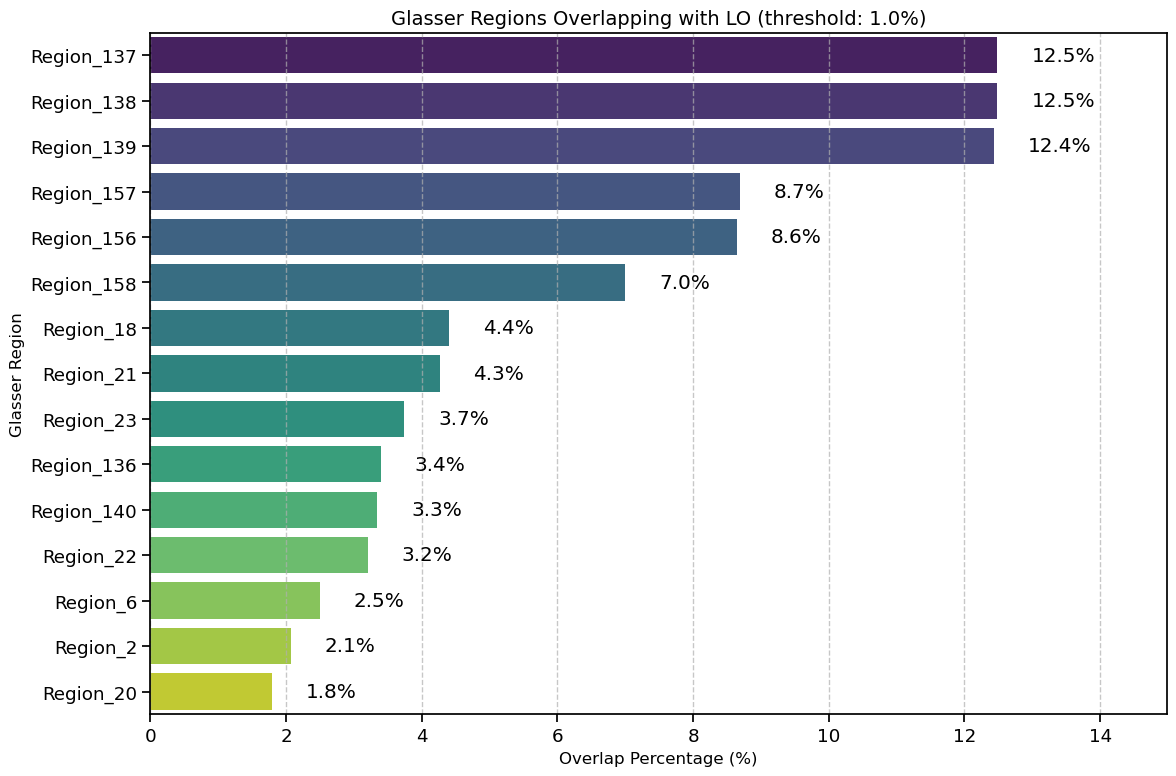

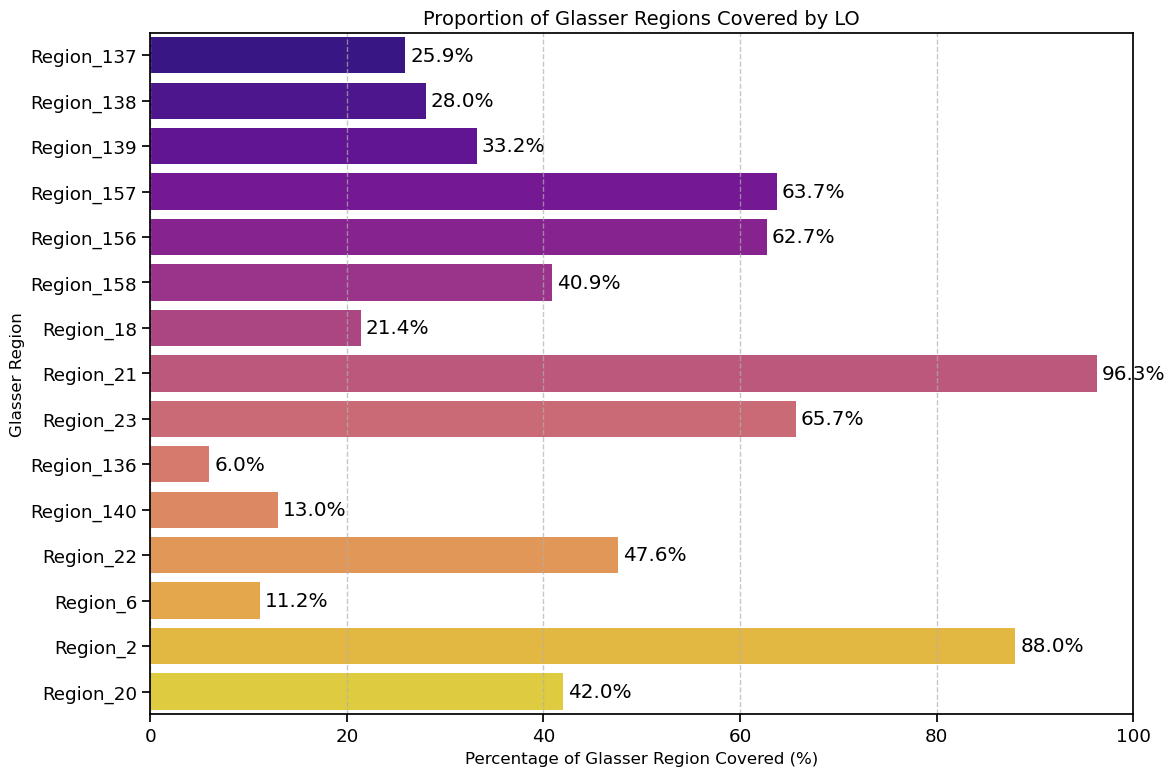

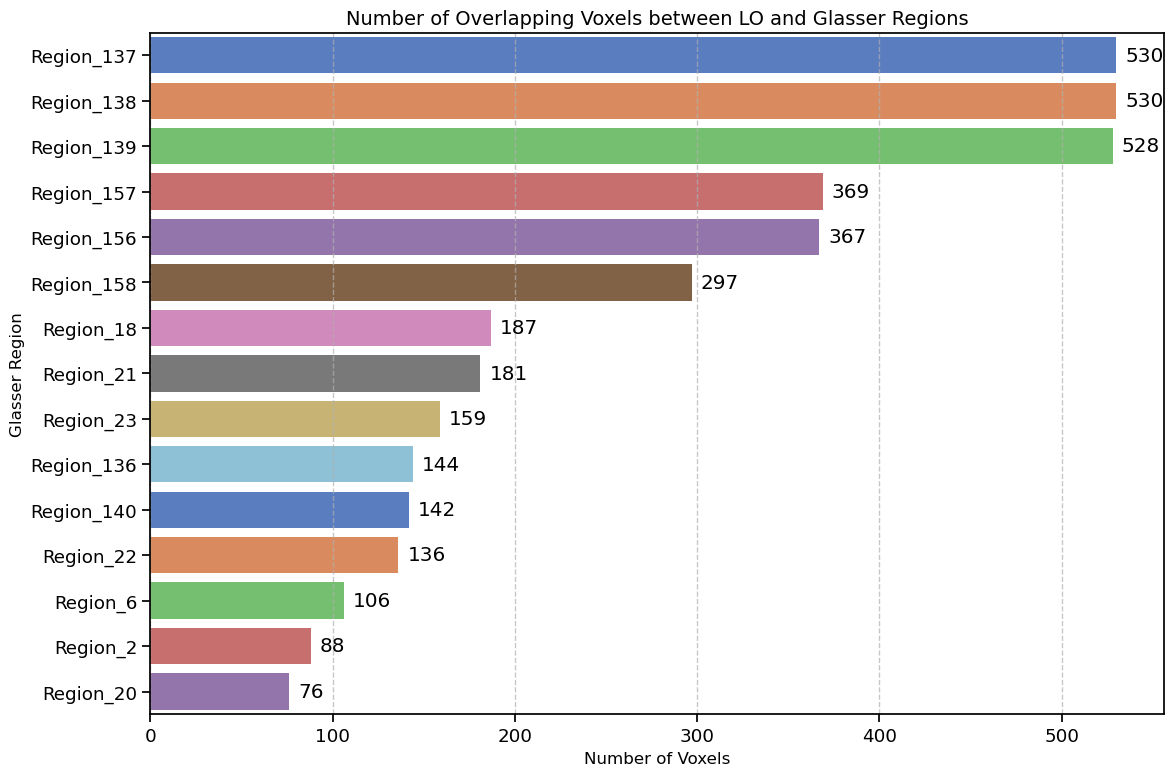

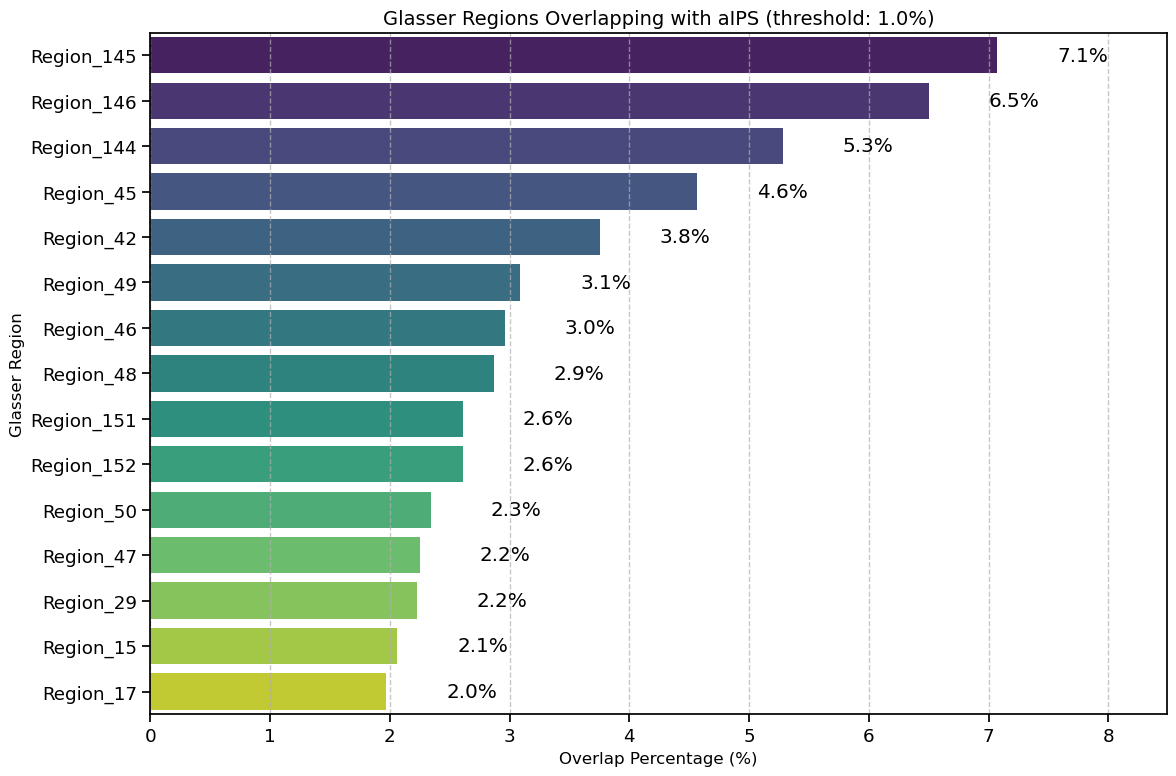

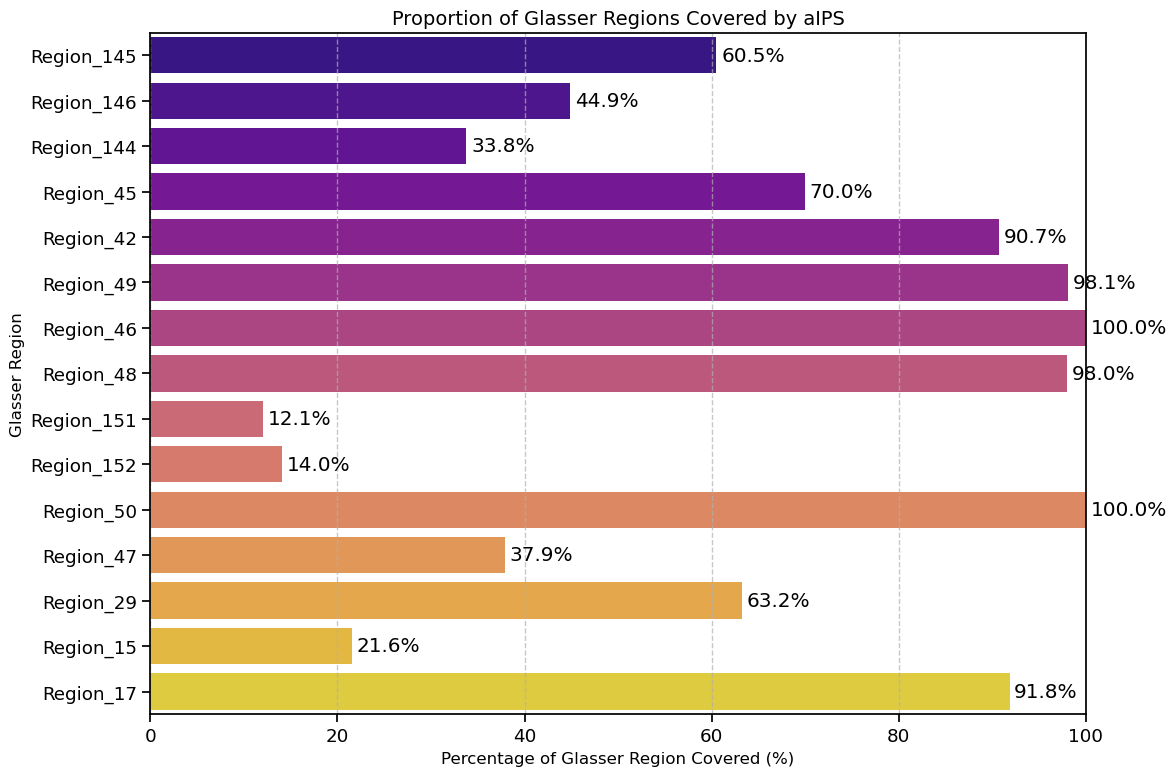

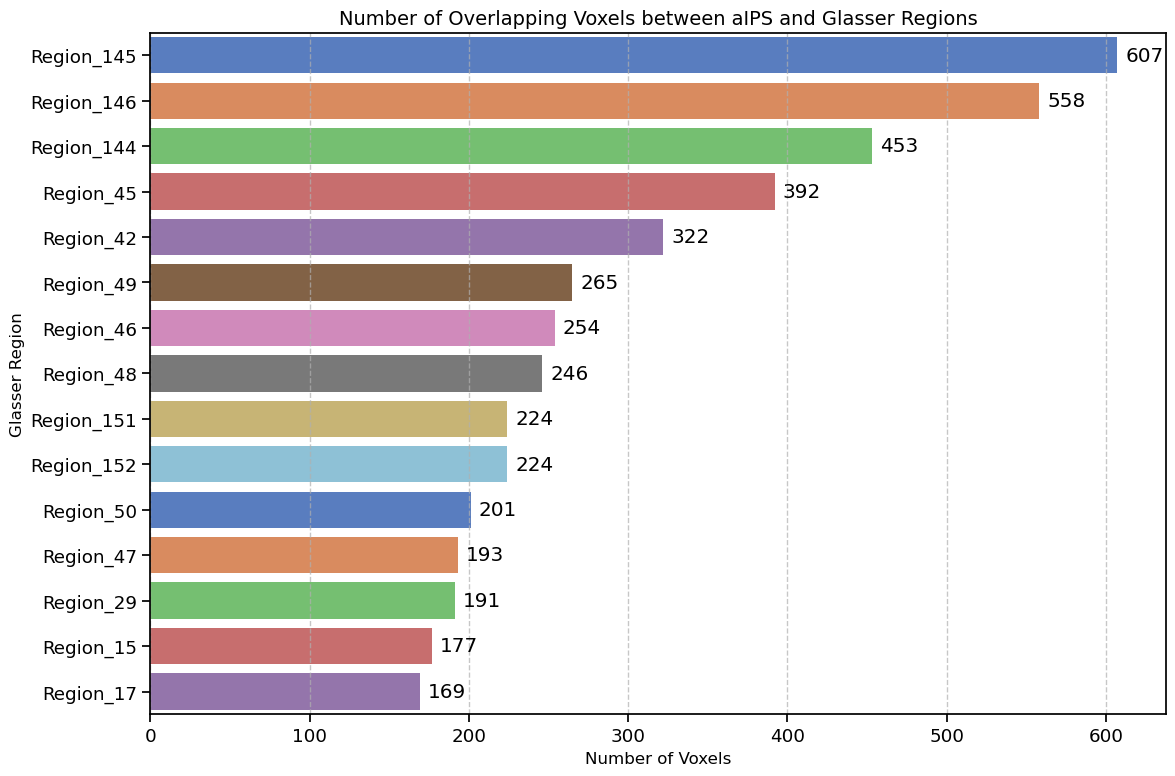

In [ ]:
# Cell 4: ROI-to-Atlas Mapping
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import image
import os
import seaborn as sns

def map_roi_to_atlas(roi_path, atlas_img, atlas_labels, resample_atlas=True):
    """
    Map a single ROI to an atlas (Glasser or Schaefer)
    
    Parameters:
    -----------
    roi_path : str
        Path to the ROI NIfTI file
    atlas_img : nibabel.nifti1.Nifti1Image
        The loaded atlas
    atlas_labels : pandas.DataFrame
        Labels for the atlas regions
    resample_atlas : bool, default=True
        If True, resample the atlas to match the ROI dimensions
        If False, resample the ROI to match atlas dimensions
        
    Returns:
    --------
    pandas.DataFrame
        Mapping between the ROI and atlas regions
    """
    print(f"Mapping ROI: {os.path.basename(roi_path)}")
    
    # Load the ROI
    roi_img = nib.load(roi_path)
    roi_name = os.path.basename(roi_path).split('.')[0]
    
    # Print ROI information
    print(f"ROI shape: {roi_img.shape}")
    print(f"ROI data type: {roi_img.get_data_dtype()}")
    print(f"ROI original voxel count: {np.count_nonzero(roi_img.get_fdata())}")
    
    # Check if dimensions match
    if roi_img.shape != atlas_img.shape:
        print(f"Dimensions don't match. ROI: {roi_img.shape}, Atlas: {atlas_img.shape}")
        
        if resample_atlas:
            print("Resampling ATLAS to match ROI dimensions...")
            try:
                # Resample the atlas to match the ROI dimensions
                resampled_atlas_img = image.resample_img(atlas_img, target_affine=roi_img.affine, 
                                          target_shape=roi_img.shape, interpolation='nearest')
                
                print(f"Original atlas shape: {atlas_img.shape}")
                print(f"Resampled atlas shape: {resampled_atlas_img.shape}")
                
                # Use the resampled atlas for mapping
                atlas_data = resampled_atlas_img.get_fdata()
            except Exception as e:
                print(f"Error resampling atlas: {e}")
                return pd.DataFrame()
        else:
            print("Resampling ROI to match atlas dimensions...")
            try:
                # Resample the ROI to match the atlas dimensions
                resampled_roi_img = image.resample_img(roi_img, target_affine=atlas_img.affine, 
                                         target_shape=atlas_img.shape, interpolation='nearest')
                
                print(f"Resampled ROI shape: {resampled_roi_img.shape}")
                print(f"Resampled ROI voxel count: {np.count_nonzero(resampled_roi_img.get_fdata())}")
                
                # Use the resampled ROI for mapping
                roi_data = resampled_roi_img.get_fdata()
                atlas_data = atlas_img.get_fdata()
            except Exception as e:
                print(f"Error resampling ROI: {e}")
                return pd.DataFrame()
    else:
        # No resampling needed
        roi_data = roi_img.get_fdata()
        atlas_data = atlas_img.get_fdata()
    
    # If we resampled the atlas, we need to use the original ROI data
    if resample_atlas and roi_img.shape != atlas_img.shape:
        roi_data = roi_img.get_fdata()
    
    # Verify ROI data
    roi_max = np.max(roi_data)
    roi_min = np.min(roi_data)
    roi_nonzero = np.count_nonzero(roi_data)
    
    print(f"ROI value range: {roi_min} to {roi_max}")
    print(f"ROI non-zero voxels: {roi_nonzero}")
    
    # Create mask for the ROI (non-zero voxels)
    roi_mask = roi_data > 0
    
    # Find overlapping atlas regions
    overlapping_atlas = atlas_data[roi_mask]
    overlapping_ids = np.unique(overlapping_atlas)
    # Remove background (values close to 0)
    overlapping_ids = overlapping_ids[overlapping_ids > 0.5]
    
    print(f"Found {len(overlapping_ids)} overlapping atlas regions")
    
    # Calculate overlap percentages
    total_roi_voxels = np.sum(roi_mask)
    mapping_data = []
    
    for atlas_id in overlapping_ids:
        # Round to nearest integer to handle potential floating point imprecision
        atlas_id_int = round(atlas_id)
        
        # Create mask for this atlas region
        # Use a tolerance to handle floating point imprecision
        atlas_mask = np.isclose(atlas_data, atlas_id, rtol=0.01)
        
        # Calculate overlap
        overlap_mask = atlas_mask & roi_mask
        overlap_voxels = np.sum(overlap_mask)
        overlap_percentage = (overlap_voxels / total_roi_voxels) * 100
        
        # Calculate proportion of the atlas region that is covered by the ROI
        atlas_region_size = np.sum(atlas_mask)
        atlas_coverage = (overlap_voxels / atlas_region_size) * 100 if atlas_region_size > 0 else 0
        
        # Get atlas region name from labels
        region_name = f"Region_{atlas_id_int}"
        if atlas_labels is not None:
            if 'id' in atlas_labels.columns and atlas_id_int in atlas_labels['id'].values:
                name_col = 'name' if 'name' in atlas_labels.columns else 'label' if 'label' in atlas_labels.columns else None
                if name_col:
                    region_names = atlas_labels.loc[atlas_labels['id'] == atlas_id_int, name_col]
                    if len(region_names) > 0:
                        region_name = region_names.iloc[0]
        
        mapping_data.append({
            'ROI': roi_name,
            'Atlas_id': atlas_id_int,
            'Atlas_name': region_name,
            'Overlap_voxels': int(overlap_voxels),
            'Overlap_percentage': overlap_percentage,
            'Atlas_coverage': atlas_coverage
        })
    
    # Create a dataframe sorted by overlap percentage
    if mapping_data:
        mapping_df = pd.DataFrame(mapping_data)
        mapping_df = mapping_df.sort_values('Overlap_percentage', ascending=False)
    else:
        mapping_df = pd.DataFrame(columns=['ROI', 'Atlas_id', 'Atlas_name', 
                                          'Overlap_voxels', 'Overlap_percentage', 'Atlas_coverage'])
    
    return mapping_df

def visualize_mapping_results(mapping_df, threshold=1.0, title_prefix="Atlas"):
    """
    Visualize the mapping results
    
    Parameters:
    -----------
    mapping_df : pandas.DataFrame
        Mapping results
    threshold : float
        Minimum overlap percentage to include in visualization
    title_prefix : str
        Prefix for plot titles (e.g., "Glasser" or "Schaefer")
    """
    if mapping_df.empty:
        print("No mapping data to visualize")
        return
    
    # Filter by threshold
    filtered_df = mapping_df[mapping_df['Overlap_percentage'] >= threshold]
    
    if filtered_df.empty:
        print(f"No regions exceed the {threshold}% overlap threshold")
        return
        
    roi_name = filtered_df['ROI'].iloc[0]
    
    # Create visualization
    plt.figure(figsize=(12, 8))
    
    # Plot top regions by overlap percentage
    ax = sns.barplot(x='Overlap_percentage', y='Atlas_name', 
                    data=filtered_df.head(15), palette='viridis')
    
    # Add values to bars
    for i, p in enumerate(ax.patches):
        width = p.get_width()
        plt.text(width + 0.5, p.get_y() + p.get_height()/2, 
                f'{width:.1f}%', ha='left', va='center')
    
    plt.title(f'{title_prefix} Regions Overlapping with {roi_name} (threshold: {threshold}%)', fontsize=14)
    plt.xlabel('Overlap Percentage (%)', fontsize=12)
    plt.ylabel(f'{title_prefix} Region', fontsize=12)
    plt.xlim(0, min(100, filtered_df['Overlap_percentage'].max() * 1.2))
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Create a second visualization showing coverage of atlas regions
    plt.figure(figsize=(12, 8))
    
    ax = sns.barplot(x='Atlas_coverage', y='Atlas_name', 
                    data=filtered_df.head(15), palette='plasma')
    
    # Add values to bars
    for i, p in enumerate(ax.patches):
        width = p.get_width()
        plt.text(width + 0.5, p.get_y() + p.get_height()/2, 
                f'{width:.1f}%', ha='left', va='center')
    
    plt.title(f'Proportion of {title_prefix} Regions Covered by {roi_name}', fontsize=14)
    plt.xlabel(f'Percentage of {title_prefix} Region Covered (%)', fontsize=12)
    plt.ylabel(f'{title_prefix} Region', fontsize=12)
    plt.xlim(0, min(100, filtered_df['Atlas_coverage'].max() * 1.2))
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Create a visualization of total voxels per region
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Overlap_voxels', y='Atlas_name', 
                    data=filtered_df.head(15), palette='muted')
    
    # Add values to bars
    for i, p in enumerate(ax.patches):
        width = p.get_width()
        plt.text(width + 5, p.get_y() + p.get_height()/2, 
                f'{int(width):,}', ha='left', va='center')
    
    plt.title(f'Number of Overlapping Voxels between {roi_name} and {title_prefix} Regions', fontsize=14)
    plt.xlabel('Number of Voxels', fontsize=12)
    plt.ylabel(f'{title_prefix} Region', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    return

# Check if we have access to the Glasser atlas
if 'glasser_img' in globals() and glasser_img is not None:
    # Map LO ROI to Glasser atlas (resampling the atlas to match ROI dimensions)
    lo_path = "/user_data/csimmon2/git_repos/ptoc/roiParcels/LO.nii.gz"
    lo_mapping = map_roi_to_atlas(lo_path, glasser_img, glasser_labels, resample_atlas=True)
    
    # Show the mapping results
    if not lo_mapping.empty:
        print("\nLO Mapping Results (top 10 overlapping regions):")
        print(lo_mapping.head(10))
        
        # Visualize the results
        visualize_mapping_results(lo_mapping, threshold=1.0, title_prefix="Glasser")
    else:
        print("LO mapping failed or no overlap found")

    # Also test with aIPS ROI
    aips_path = "/user_data/csimmon2/git_repos/ptoc/roiParcels/aIPS.nii.gz"
    aips_mapping = map_roi_to_atlas(aips_path, glasser_img, glasser_labels, resample_atlas=True)
    
    # Show the mapping results
    if not aips_mapping.empty:
        print("\naIPS Mapping Results (top 10 overlapping regions):")
        print(aips_mapping.head(10))
        
        # Visualize the results
        visualize_mapping_results(aips_mapping, threshold=1.0, title_prefix="Glasser")
    else:
        print("aIPS mapping failed or no overlap found")
else:
    print("Glasser atlas not available. Please run the previous cell to load it.")

# Optional: Try to find and load a Schaefer atlas for comparison
def find_schaefer_atlas():
    """Try to find a Schaefer atlas in the repository"""
    try:
        repo_dir = "/user_data/csimmon2/git_repos/ptoc"
        print("Searching for Schaefer atlas...")
        
        command = f"find {repo_dir} -name '*.nii.gz' | grep -i schaefer"
        import subprocess
        result = subprocess.run(command, shell=True, capture_output=True, text=True)
        
        if result.stdout.strip():
            schaefer_paths = result.stdout.strip().split('\n')
            print(f"Found {len(schaefer_paths)} potential Schaefer atlas files:")
            for i, path in enumerate(schaefer_paths):
                print(f"{i+1}. {path}")
            
            # Return the first found file
            return schaefer_paths[0] if schaefer_paths else None
        else:
            print("No Schaefer atlas found")
            return None
    except Exception as e:
        print(f"Error searching for Schaefer atlas: {e}")
        return None

# Check if you want to look for a Schaefer atlas
search_for_schaefer = False  # Set to True if you want to try Schaefer

if search_for_schaefer:
    schaefer_path = find_schaefer_atlas()
    if schaefer_path:
        try:
            schaefer_img = nib.load(schaefer_path)
            print(f"Loaded Schaefer atlas from {schaefer_path}")
            print(f"Shape: {schaefer_img.shape}")
            
            # Create basic labels
            schaefer_data = schaefer_img.get_fdata()
            unique_values = np.unique(schaefer_data)
            unique_values = unique_values[unique_values > 0]
            
            schaefer_labels = pd.DataFrame({
                'id': unique_values,
                'name': [f"Network_{int(val)}" for val in unique_values]
            })
            
            print(f"Created basic labels for {len(schaefer_labels)} Schaefer networks")
            
            # Map LO ROI to Schaefer atlas
            lo_schaefer_mapping = map_roi_to_atlas(lo_path, schaefer_img, schaefer_labels, resample_atlas=True)
            
            if not lo_schaefer_mapping.empty:
                print("\nLO to Schaefer Mapping Results (top 10 overlapping regions):")
                print(lo_schaefer_mapping.head(10))
                
                visualize_mapping_results(lo_schaefer_mapping, threshold=1.0, title_prefix="Schaefer")
            
        except Exception as e:
            print(f"Error processing Schaefer atlas: {e}")

Found 10 total ROI files
Using 4 focus ROIs: ['LO', 'PFS', 'aIPS', 'pIPS']
Resampling atlas to match ROI dimensions: (91, 109, 91)
Highest Glasser atlas ID: 179
Will assign ROIs starting from ID: 180

Processing LO...
  ROI voxel count: 4245
  Overlaps with 19 Glasser regions
  Top overlapping Glasser regions:
    Glasser region 137: 12.5% of ROI, 25.9% of Glasser region
    Glasser region 138: 12.5% of ROI, 28.0% of Glasser region
    Glasser region 139: 12.4% of ROI, 33.2% of Glasser region
    Glasser region 157: 8.7% of ROI, 63.7% of Glasser region
    Glasser region 156: 8.6% of ROI, 62.7% of Glasser region

Processing PFS...
  ROI voxel count: 1960
  Overlaps with 13 Glasser regions
  Top overlapping Glasser regions:
    Glasser region 18: 14.7% of ROI, 33.1% of Glasser region
    Glasser region 135: 14.1% of ROI, 10.5% of Glasser region
    Glasser region 136: 14.1% of ROI, 11.5% of Glasser region
    Glasser region 163: 14.0% of ROI, 18.6% of Glasser region
    Glasser region 1

/home/csimmon2/anaconda3/envs/brainiak_env/lib/python3.7/site-packages/numpy/ma/core.py:2830: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/home/csimmon2/anaconda3/envs/brainiak_env/lib/python3.7/site-packages/ipykernel_launcher.py:255: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


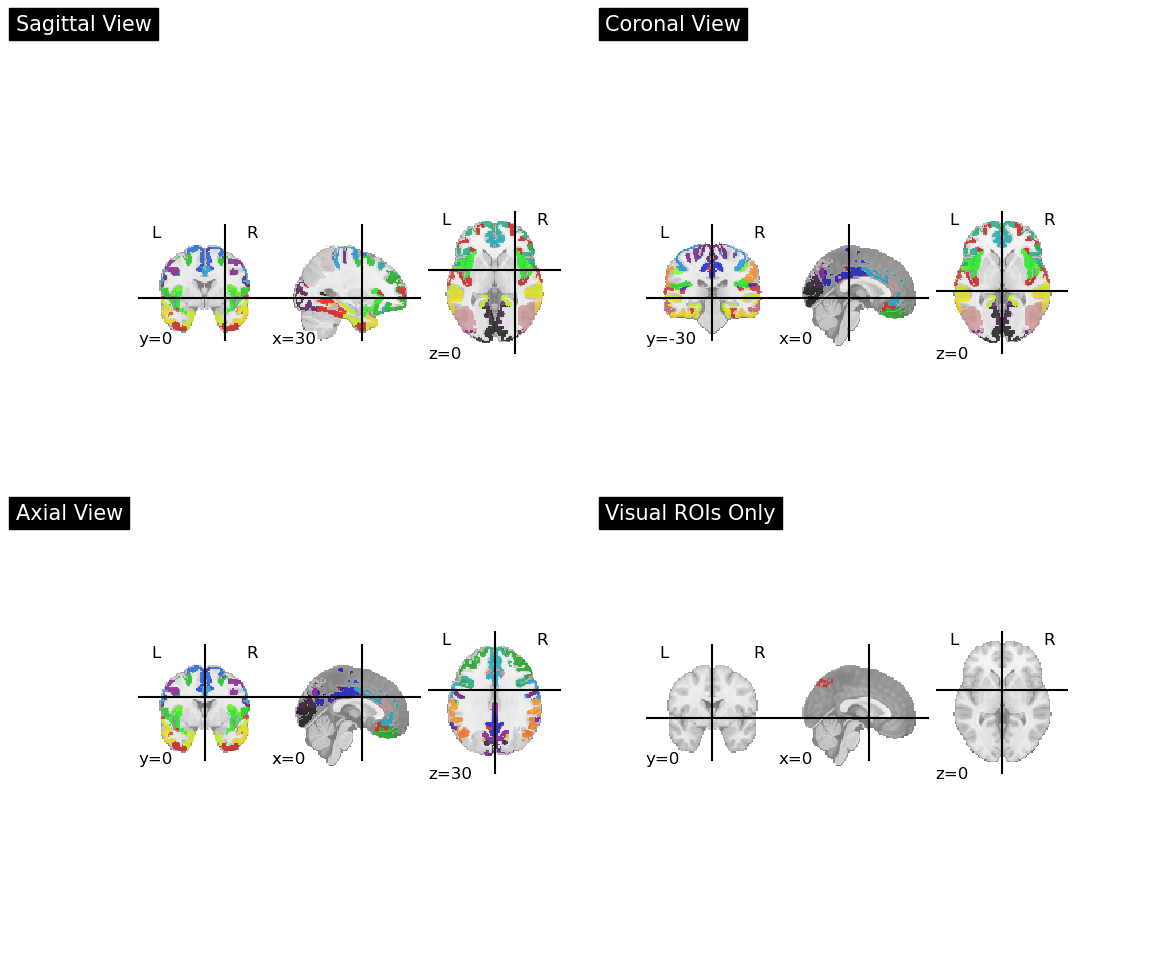

/home/csimmon2/anaconda3/envs/brainiak_env/lib/python3.7/site-packages/ipykernel_launcher.py:262: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 1000x800 with 0 Axes>

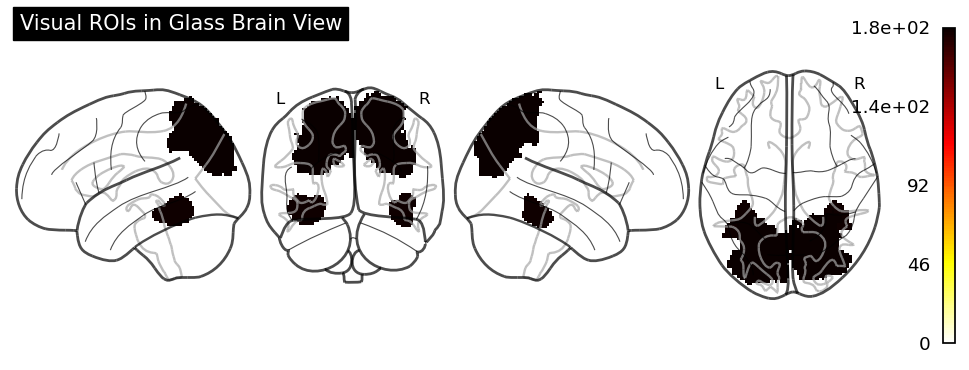


LO overlaps with 19 Glasser regions
Total coverage: 93.1%
Top regions by coverage of LO:
  Glasser 137: 12.5% of LO
  Glasser 138: 12.5% of LO
  Glasser 139: 12.4% of LO
  Glasser 157: 8.7% of LO
  Glasser 156: 8.6% of LO

pIPS overlaps with 28 Glasser regions
Total coverage: 87.3%
Top regions by coverage of pIPS:
  Glasser 144: 11.3% of pIPS
  Glasser 145: 9.6% of pIPS
  Glasser 146: 9.5% of pIPS
  Glasser 143: 7.7% of pIPS
  Glasser 142: 7.6% of pIPS

aIPS overlaps with 31 Glasser regions
Total coverage: 60.8%
Top regions by coverage of aIPS:
  Glasser 145: 7.1% of aIPS
  Glasser 146: 6.5% of aIPS
  Glasser 144: 5.3% of aIPS
  Glasser 45: 4.6% of aIPS
  Glasser 42: 3.8% of aIPS

PFS overlaps with 13 Glasser regions
Total coverage: 99.1%
Top regions by coverage of PFS:
  Glasser 18: 14.7% of PFS
  Glasser 135: 14.1% of PFS
  Glasser 136: 14.1% of PFS
  Glasser 163: 14.0% of PFS
  Glasser 154: 8.3% of PFS


In [31]:
# Cell 5: Create Integrated Parcellation
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import image, plotting
import os
import glob

def create_integrated_parcellation(roi_dir, atlas_img, atlas_labels=None, output_dir=None):
    """
    Create an integrated parcellation that preserves specialized ROIs
    and uses Glasser atlas for the rest of the brain
    
    Parameters:
    -----------
    roi_dir : str
        Directory containing ROI files
    atlas_img : nibabel.nifti1.Nifti1Image
        Glasser atlas
    atlas_labels : pandas.DataFrame, optional
        Labels for the Glasser atlas regions
    output_dir : str, optional
        Directory to save the integrated parcellation
        
    Returns:
    --------
    tuple
        (integrated_img, integrated_labels, roi_mapping)
    """
    # Expand directory paths
    roi_dir = os.path.expanduser(roi_dir)
    if output_dir is None:
        output_dir = roi_dir
    else:
        output_dir = os.path.expanduser(output_dir)
        os.makedirs(output_dir, exist_ok=True)
    
    # Find ROI files
    roi_files = sorted(glob.glob(os.path.join(roi_dir, "*.nii.gz")))
    print(f"Found {len(roi_files)} total ROI files")
    
    # Filter to include only the ROIs we're focusing on
    focus_rois = ['LO', 'pIPS', 'aIPS', 'PFS']
    roi_files = [f for f in roi_files if os.path.basename(f).split('.')[0] in focus_rois]
    print(f"Using {len(roi_files)} focus ROIs: {[os.path.basename(f).split('.')[0] for f in roi_files]}")
    
    # Resample the atlas to match the first ROI's dimensions
    first_roi = nib.load(roi_files[0])
    if first_roi.shape != atlas_img.shape:
        print(f"Resampling atlas to match ROI dimensions: {first_roi.shape}")
        resampled_atlas = image.resample_img(atlas_img, target_affine=first_roi.affine,
                                         target_shape=first_roi.shape, interpolation='nearest')
    else:
        resampled_atlas = atlas_img
    
    # Get data arrays
    atlas_data = resampled_atlas.get_fdata()
    
    # Create a mask for all ROIs combined
    combined_roi_mask = np.zeros_like(atlas_data, dtype=bool)
    
    # Create a dictionary to track which atlas regions overlap with each ROI
    roi_atlas_overlaps = {}
    
    # Start with a fresh copy of atlas data for our integrated parcellation
    integrated_data = atlas_data.copy()
    
    # Assign new label IDs starting after the highest atlas ID
    max_atlas_id = int(np.nanmax(atlas_data))
    next_id = max_atlas_id + 1
    print(f"Highest Glasser atlas ID: {max_atlas_id}")
    print(f"Will assign ROIs starting from ID: {next_id}")
    
    # Initialize labels dataframe
    # Start with atlas labels if provided
    if atlas_labels is not None:
        integrated_labels = atlas_labels.copy()
    else:
        # Create basic atlas labels if not provided
        unique_ids = np.unique(atlas_data)
        unique_ids = unique_ids[unique_ids > 0]  # Remove background
        
        integrated_labels = pd.DataFrame({
            'id': [int(round(id)) for id in unique_ids],
            'name': [f"Glasser_Region_{int(round(id))}" for id in unique_ids],
            'type': 'glasser_atlas',
            'source': 'original'
        })
    
    # Track which Glasser regions are replaced by ROIs
    roi_mapping = []
    
    # Process each ROI
    for roi_file in roi_files:
        roi_name = os.path.basename(roi_file).split('.')[0]
        print(f"\nProcessing {roi_name}...")
        
        # Load ROI
        roi_img = nib.load(roi_file)
        roi_data = roi_img.get_fdata()
        
        # Create mask for this ROI
        roi_mask = roi_data > 0
        roi_voxel_count = np.sum(roi_mask)
        print(f"  ROI voxel count: {roi_voxel_count}")
        
        # Find overlapping atlas regions
        overlapping_atlas = atlas_data[roi_mask]
        overlapping_ids = np.unique(overlapping_atlas)
        # Remove background (values close to 0)
        overlapping_ids = overlapping_ids[overlapping_ids > 0.5]
        
        # Round to nearest integers
        overlapping_ids_int = np.round(overlapping_ids).astype(int)
        print(f"  Overlaps with {len(overlapping_ids_int)} Glasser regions")
        
        # Calculate overlap percentages
        overlap_info = []
        for glasser_id in overlapping_ids:
            glasser_id_int = int(round(glasser_id))
            
            # Create mask for this Glasser region within the ROI
            glasser_mask = np.isclose(atlas_data, glasser_id, rtol=0.01)
            overlap_mask = glasser_mask & roi_mask
            overlap_voxels = np.sum(overlap_mask)
            
            # Calculate what percentage of the ROI is covered by this Glasser region
            roi_coverage = (overlap_voxels / roi_voxel_count) * 100
            
            # Calculate what percentage of the Glasser region is covered by this ROI
            glasser_voxels = np.sum(glasser_mask)
            glasser_coverage = (overlap_voxels / glasser_voxels) * 100 if glasser_voxels > 0 else 0
            
            overlap_info.append({
                'roi': roi_name,
                'glasser_id': glasser_id_int,
                'overlap_voxels': int(overlap_voxels),
                'roi_coverage': roi_coverage,
                'glasser_coverage': glasser_coverage
            })
        
        # Create DataFrame and sort by overlap percentage
        overlap_df = pd.DataFrame(overlap_info)
        overlap_df = overlap_df.sort_values('roi_coverage', ascending=False)
        
        # Print top 5 overlapping regions
        print("  Top overlapping Glasser regions:")
        for _, row in overlap_df.head(5).iterrows():
            print(f"    Glasser region {row['glasser_id']}: {row['roi_coverage']:.1f}% of ROI, {row['glasser_coverage']:.1f}% of Glasser region")
        
        # Store overlap information
        roi_atlas_overlaps[roi_name] = overlap_df
        
        # Add this ROI to the combined mask
        combined_roi_mask |= roi_mask
        
        # Replace atlas labels with this ROI's custom label in the integrated parcellation
        integrated_data[roi_mask] = next_id
        
        # Add to integrated labels
        new_label = {
            'id': next_id,
            'name': roi_name,
            'type': 'specialized_roi',
            'source': 'wang_julien'
        }
        
        # Add to integrated labels dataframe
        integrated_labels = pd.concat([integrated_labels, pd.DataFrame([new_label])], ignore_index=True)
        
        # Track which Glasser regions this ROI replaces
        for _, row in overlap_df.iterrows():
            roi_mapping.append({
                'roi_name': roi_name,
                'roi_id': next_id,
                'replaced_glasser_id': row['glasser_id'],
                'overlap_voxels': row['overlap_voxels'],
                'roi_coverage': row['roi_coverage'],
                'glasser_coverage': row['glasser_coverage']
            })
        
        # Increment ID for next ROI
        next_id += 1
    
    # Create the integrated parcellation image
    integrated_img = nib.Nifti1Image(integrated_data, resampled_atlas.affine)
    
    # Convert roi_mapping to DataFrame
    roi_mapping_df = pd.DataFrame(roi_mapping)
    
    # Save the integrated parcellation
    integrated_path = os.path.join(output_dir, "integrated_parcellation.nii.gz")
    integrated_img.to_filename(integrated_path)
    print(f"\nSaved integrated parcellation to: {integrated_path}")
    
    # Save the labels
    labels_path = os.path.join(output_dir, "integrated_labels.csv")
    integrated_labels.to_csv(labels_path, index=False)
    print(f"Saved integrated labels to: {labels_path}")
    
    # Save the ROI mapping
    mapping_path = os.path.join(output_dir, "roi_glasser_mapping.csv")
    roi_mapping_df.to_csv(mapping_path, index=False)
    print(f"Saved ROI-to-Glasser mapping to: {mapping_path}")
    
    return integrated_img, integrated_labels, roi_mapping_df

def visualize_integrated_parcellation(integrated_img, roi_names):
    """
    Create visualizations of the integrated parcellation
    
    Parameters:
    -----------
    integrated_img : nibabel.nifti1.Nifti1Image
        The integrated parcellation image
    roi_names : list
        List of ROI names to highlight
    """
    # Create a figure with multiple views
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Get data
    data = integrated_img.get_fdata()
    
    # Plot sagittal view
    plotting.plot_roi(integrated_img, cut_coords=(30, 0, 0), axes=axes[0, 0],
                     title="Sagittal View", cmap='nipy_spectral')
    
    # Plot coronal view
    plotting.plot_roi(integrated_img, cut_coords=(0, -30, 0), axes=axes[0, 1],
                     title="Coronal View", cmap='nipy_spectral')
    
    # Plot axial view
    plotting.plot_roi(integrated_img, cut_coords=(0, 0, 30), axes=axes[1, 0],
                     title="Axial View", cmap='nipy_spectral')
    
    # Create a separate visualization highlighting just the ROIs
    unique_values = np.unique(data)
    max_glasser_id = 180  # Based on Glasser having 180 regions
    
    # Create a mask of just the ROIs
    roi_mask = np.zeros_like(data)
    for val in unique_values:
        if val > max_glasser_id:  # This is an ROI
            roi_mask[data == val] = val
    
    # Create an image with just the ROIs
    roi_img = nib.Nifti1Image(roi_mask, integrated_img.affine)
    
    # Plot the ROIs
    plotting.plot_roi(roi_img, cut_coords=(0, 0, 0), axes=axes[1, 1],
                     title="Visual ROIs Only", cmap='Set1')
    
    plt.tight_layout()
    plt.show()
    
    # Create a 3D glass brain view
    plt.figure(figsize=(10, 8))
    plotting.plot_glass_brain(roi_img, title="Visual ROIs in Glass Brain View", 
                            colorbar=True, plot_abs=False, display_mode='lyrz')
    plt.tight_layout()
    plt.show()

# Execute the function
try:
    # Check if we have the required variables
    if 'glasser_img' in globals() and glasser_img is not None:
        # Create the integrated parcellation
        integrated_img, integrated_labels, roi_mapping = create_integrated_parcellation(
            roi_dir="/user_data/csimmon2/git_repos/ptoc/roiParcels",
            atlas_img=glasser_img,
            atlas_labels=glasser_labels,
            output_dir="/user_data/csimmon2/git_repos/ptoc/results/integrated_parcellation"
        )
        
        # Visualize the result
        visualize_integrated_parcellation(integrated_img, ['LO', 'pIPS', 'aIPS', 'PFS'])
        
        # Show the mapping summary for each ROI
        for roi in ['LO', 'pIPS', 'aIPS', 'PFS']:
            roi_specific = roi_mapping[roi_mapping['roi_name'] == roi]
            if not roi_specific.empty:
                total_coverage = roi_specific['roi_coverage'].sum()
                print(f"\n{roi} overlaps with {len(roi_specific)} Glasser regions")
                print(f"Total coverage: {total_coverage:.1f}%")
                
                # Show top 5 regions by coverage
                print(f"Top regions by coverage of {roi}:")
                top_by_coverage = roi_specific.sort_values('roi_coverage', ascending=False).head(5)
                for _, row in top_by_coverage.iterrows():
                    print(f"  Glasser {row['replaced_glasser_id']}: {row['roi_coverage']:.1f}% of {roi}")
    else:
        print("Glasser atlas not loaded. Please run the previous cells first.")
except Exception as e:
    print(f"Error creating integrated parcellation: {e}")